In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import nengo
import nengo_bio as bio
import numpy as np

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
def get_convergence_histogram(**kwargs):
    with nengo.Network(seed=589291) as model:
        ens_A = bio.Ensemble(
            n_neurons=100,
            dimensions=1,
            locations=bio.NeuralSheetDist(),
            p_exc=1.0,
            encoders=np.ones((100, 1)),
            intercepts=nengo.dists.Uniform(0.0, 0.0)
        )
        ens_B = bio.Ensemble(
            n_neurons=101,
            dimensions=1,
            locations=bio.NeuralSheetDist(),
            encoders=np.ones((101, 1)),
            intercepts=nengo.dists.Uniform(0.0, 0.0),
        )

        con = bio.Connection(
            ens_A, ens_B,
            connectivity=bio.SpatiallyConstrainedConnectivity(
                convergence=30,
            ),
            **kwargs)

                
    with nengo.Simulator(model) as sim:
        ws = sim.model.params[con].weights

    return ((ws[bio.Excitatory] - ws[bio.Inhibitory]) > 0.0).sum(axis=0)

/home/astoecke/source/nengo-bio/nengo_bio/solvers.py:46: UserWarning: bioneuronqp is installed, but did not find libbioneuronqp.so; make sure the library is located in your search path
  category=UserWarning)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

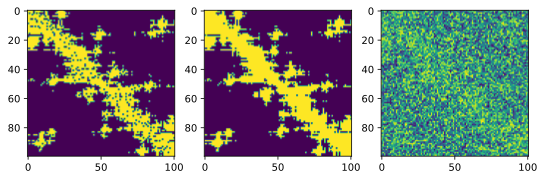

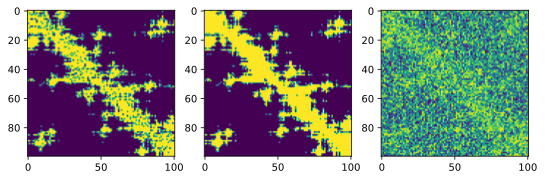

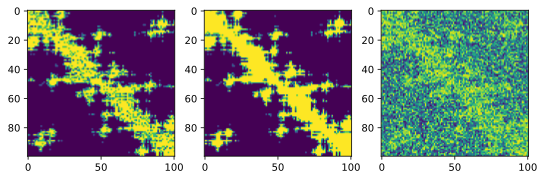

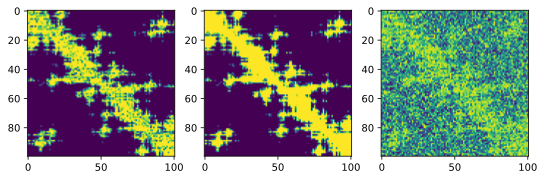

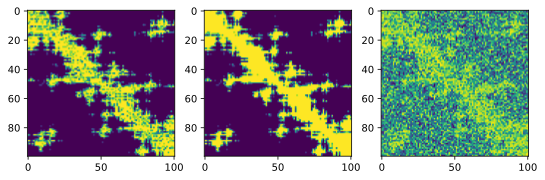

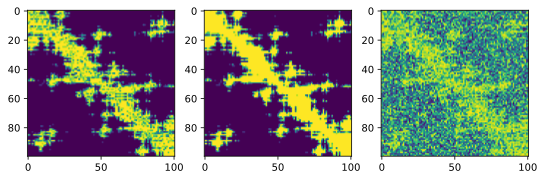

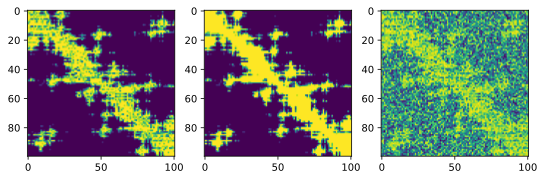

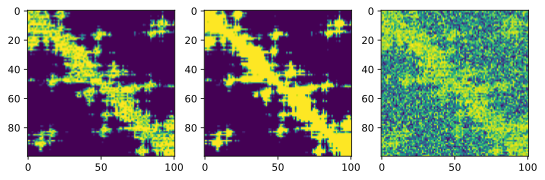

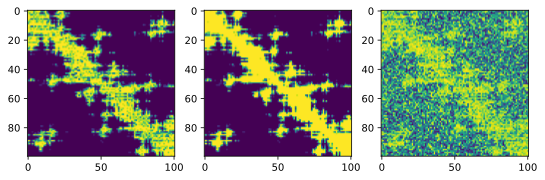

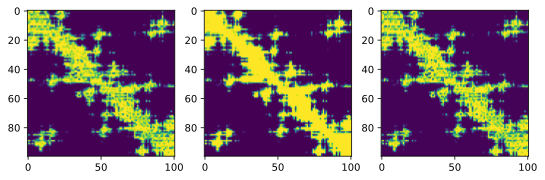

In [3]:
hist_without_refine = get_convergence_histogram(
    solver=bio.solvers.QPSolver(reg=1e-6),
    decode_bias=False,
)
# hist_with_refine = get_convergence_histogram(
#      solver=bio.solvers.QPSolver(reg=1e-6),
#      refine=10,
#      decode_bias=True
#  )

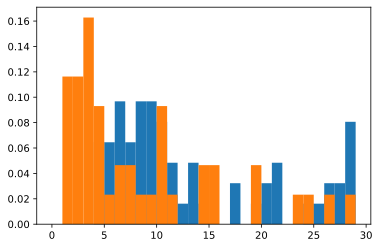

In [4]:
fig, ax = plt.subplots()
ax.hist(hist_without_refine, bins=np.arange(30), density=True);
ax.hist(hist_with_refine, bins=np.arange(30), density=True);

In [5]:
?bio.solvers.QPSolver

Init signature: bio.solvers.QPSolver(reg=0.001, relax=False, extra_args=None)
Docstring:     
Extended solver class used by nengo_bio. Passes neuron types and target
currents to the solver routine. Always solves for a full weight matrix.
Non-compositional.
File:           ~/source/nengo-bio/nengo_bio/solvers.py
Type:           type
Subclasses:     
